In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [2]:
print(len(X_train))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train[:5])
print(X_train[:2])

50000
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155

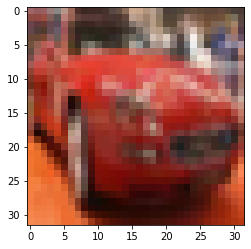

In [3]:
import matplotlib.pyplot as plt

digit = X_train[5]
plt.imshow(digit)
plt.show()

In [4]:
import numpy as np

np.set_printoptions(linewidth=300)
print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


In [5]:
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [6]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

X_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431, 0.28235294])

In [7]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_vaild, y_train, y_vaild = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 3072), (40000, 10), (10000, 3072), (10000, 10))

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2048, activation = 'tanh', input_shape=(3072,)))
model.add(layers.Dense(1024, activation='tanh'))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,081,994
Trainable params: 9,081,994
Non-trainable params: 0
______________________________________________

In [10]:
%%time

Hist = model.fit(X_train, y_train, epochs=100, batch_size=518, validation_data=(X_vaild, y_vaild))

Epoch 1/100
78/78 [==============================] - 5s 19ms/step - loss: 2.3969 - accuracy: 0.1304 - val_loss: 2.1864 - val_accuracy: 0.1634
Epoch 2/100
78/78 [==============================] - 1s 12ms/step - loss: 2.0919 - accuracy: 0.1808 - val_loss: 2.0661 - val_accuracy: 0.1939
Epoch 3/100
78/78 [==============================] - 1s 12ms/step - loss: 2.0404 - accuracy: 0.2079 - val_loss: 1.9736 - val_accuracy: 0.2450
Epoch 4/100
78/78 [==============================] - 1s 12ms/step - loss: 1.9706 - accuracy: 0.2600 - val_loss: 2.0440 - val_accuracy: 0.2265
Epoch 5/100
78/78 [==============================] - 1s 12ms/step - loss: 1.9224 - accuracy: 0.2899 - val_loss: 1.8523 - val_accuracy: 0.3170
Epoch 6/100
78/78 [==============================] - 1s 12ms/step - loss: 1.8618 - accuracy: 0.3194 - val_loss: 1.7930 - val_accuracy: 0.3492
Epoch 7/100
78/78 [==============================] - 1s 11ms/step - loss: 1.7968 - accuracy: 0.3435 - val_loss: 1.8200 - val_accuracy: 0.3409
Epoch 

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.6309 - accuracy: 0.4717


(1.630869746208191, 0.4717000126838684)

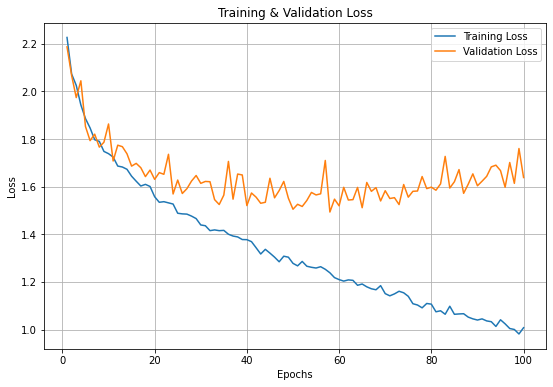

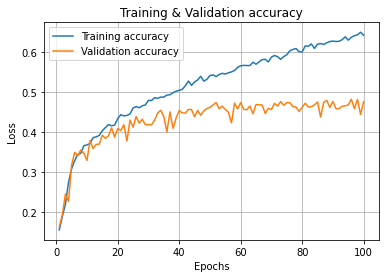

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

In [16]:
np.set_printoptions(suppress=True, precision=5)
print(model.predict(X_test[:1,:]))

[[0.02958 0.00027 0.13143 0.42884 0.04882 0.30442 0.01965 0.02759 0.00795 0.00144]]


In [17]:
print(model.predict_classes(X_test[:1,:]))

[3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
